# Цель работы
Ознакомиться с методами ассоциативного анализа из библиотеки MLxtend
# Ход работы
## Загрузка данных

In [233]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, fpmax, association_rules
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [234]:
all_data = pd.read_csv('groceries - groceries.csv')
all_data #Видно, что датафрейм содержит NaN значения

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in
np_data]

In [236]:
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)
print('Количество товаров', len(unique_items), unique_items)

Количество товаров 169 {'hygiene articles', 'sweet spreads', 'salty snack', 'mayonnaise', 'sparkling wine', 'dessert', 'liqueur', 'curd cheese', 'butter', 'bottled beer', 'house keeping products', 'frozen meals', 'misc. beverages', 'liquor (appetizer)', 'pickled vegetables', 'specialty vegetables', 'cooking chocolate', 'kitchen towels', 'potted plants', 'sausage', 'specialty bar', 'bottled water', 'canned fish', 'soda', 'vinegar', 'sauces', 'grapes', 'liquor', 'whisky', 'organic sausage', 'beverages', 'nut snack', 'shopping bags', 'canned vegetables', 'onions', 'soups', 'chewing gum', 'photo/film', 'light bulbs', 'specialty chocolate', 'salt', 'baking powder', 'toilet cleaner', 'whipped/sour cream', 'cake bar', 'condensed milk', 'cereals', 'ketchup', 'meat spreads', 'red/blush wine', 'rolls/buns', 'skin care', 'berries', 'butter milk', 'specialty fat', 'frozen fish', 'cling film/bags', 'decalcifier', 'bags', 'fish', 'detergent', 'frozen potato products', 'Instant food products', 'pip f

In [237]:
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)
data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [238]:
fpg_result = fpgrowth(data, min_support=0.03, use_colnames = True).sort_values('support', ascending=False)
fpg_result

,support,itemsets
5,0.255516,(whole milk)
8,0.193493,(other vegetables)
11,0.183935,(rolls/buns)
19,0.174377,(soda)
2,0.139502,(yogurt)
...,...,...
43,0.031012,(onions)
61,0.030605,"(sausage, rolls/buns)"
44,0.030503,"(whole milk, citrus fruit)"
42,0.030402,(specialty chocolate)


In [239]:
def printMinMaxSupport(result):
    curr_len = 1
    while True:
        sups = result[result['itemsets'].apply(lambda r: len(r) == curr_len)]['support']
        if len(sups) == 0:
            break
        print('Длина набора {len}: поддержка [{min}, {max}]'.format(len=curr_len, min=round(np.min(sups), 5), max=round(np.max(sups), 5)))
        curr_len += 1
printMinMaxSupport(fpg_result)

Длина набора 1: поддержка [0.0304, 0.25552]
Длина набора 2: поддержка [0.0301, 0.07483]


In [240]:
fpm_result = fpmax(data, min_support=0.03, use_colnames = True).sort_values('support', ascending=False)
fpm_result

,support,itemsets
35,0.098526,(shopping bags)
31,0.080529,(bottled beer)
30,0.079817,(newspapers)
29,0.077682,(canned beer)
49,0.074835,"(whole milk, other vegetables)"
27,0.072293,(fruit/vegetable juice)
25,0.064870,(brown bread)
24,0.063447,(domestic eggs)
23,0.058973,(frankfurter)
22,0.058566,(margarine)


In [241]:
printMinMaxSupport(fpm_result)

Длина набора 1: поддержка [0.0304, 0.09853]
Длина набора 2: поддержка [0.0301, 0.07483]


<AxesSubplot:xlabel='Количество попаданий товара в транзакцию'>

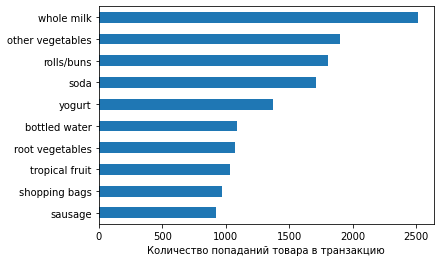

In [242]:
plt.xlabel('Количество попаданий товара в транзакцию')
data.sum().nlargest(10).sort_values().plot.barh()

<AxesSubplot:xlabel='Уровень поддержки', ylabel='itemsets'>

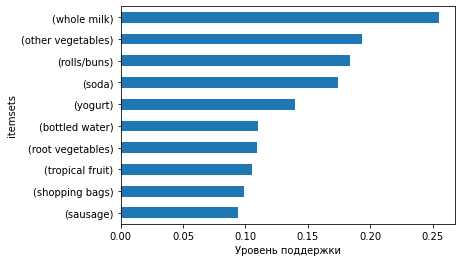

In [243]:
plt.xlabel('Уровень поддержки')
fpg_result.set_index('itemsets')['support'].nlargest(10).sort_values().plot.barh()

<AxesSubplot:xlabel='Уровень поддержки', ylabel='itemsets'>

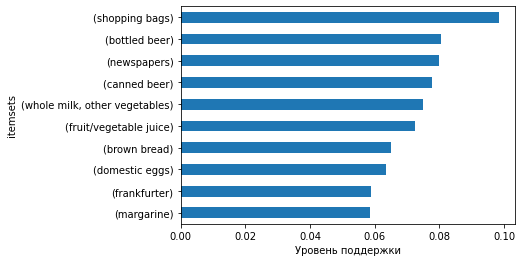

In [244]:
plt.xlabel('Уровень поддержки')
fpm_result.set_index('itemsets')['support'].nlargest(10).sort_values().plot.barh()

In [245]:
items = ['whole milk', 'yogurt', 'soda', 'tropical fruit', 'shopping bags', 'sausage', 'whipped/sour cream', 'rolls/buns', 'other vegetables', 'root vegetables', 'pork', 'bottled water', 'pastry', 'citrus fruit', 'canned beer', 'bottled beer']
np_data_new = all_data.to_numpy()
np_data_new = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data_new]

In [246]:
te_new = TransactionEncoder()
te_ary_new = te_new.fit_transform(np_data_new)
data_new = pd.DataFrame(te_ary_new, columns=te_new.columns_)
data_new

,bottled beer,bottled water,canned beer,citrus fruit,other vegetables,pastry,pork,rolls/buns,root vegetables,sausage,shopping bags,soda,tropical fruit,whipped/sour cream,whole milk,yogurt
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,True,False,False,False,False,True,True,False,False,False,True,True,False
9831,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True
9833,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [247]:
fpg_result_new = fpgrowth(data_new, min_support=0.03, use_colnames = True).sort_values('support', ascending=False)
fpg_result_new

,support,itemsets
3,0.255516,(whole milk)
4,0.193493,(other vegetables)
5,0.183935,(rolls/buns)
8,0.174377,(soda)
1,0.139502,(yogurt)
7,0.110524,(bottled water)
10,0.108998,(root vegetables)
2,0.104931,(tropical fruit)
13,0.098526,(shopping bags)
12,0.093950,(sausage)


In [248]:
fpm_result_new = fpmax(data_new, min_support=0.03, use_colnames = True).sort_values('support', ascending=False)
fpm_result_new

,support,itemsets
7,0.098526,(shopping bags)
3,0.080529,(bottled beer)
2,0.077682,(canned beer)
21,0.074835,"(whole milk, other vegetables)"
0,0.057651,(pork)
20,0.056634,"(whole milk, rolls/buns)"
15,0.056024,"(whole milk, yogurt)"
11,0.048907,"(root vegetables, whole milk)"
10,0.047382,"(root vegetables, other vegetables)"
14,0.043416,"(yogurt, other vegetables)"


In [249]:
printMinMaxSupport(fpg_result_new)
printMinMaxSupport(fpm_result_new)

Длина набора 1: поддержка [0.05765, 0.25552]
Длина набора 2: поддержка [0.0305, 0.07483]
Длина набора 1: поддержка [0.05765, 0.09853]
Длина набора 2: поддержка [0.0305, 0.07483]


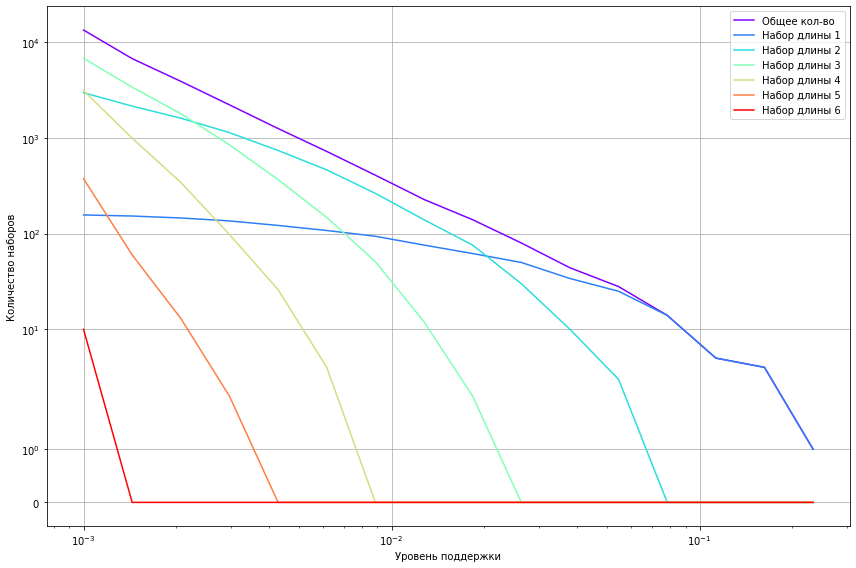

In [263]:
min_supports = np.arange(0.0, 1, 0.01)
sup_data = []

for min_support in np.logspace(-3, 0, num=20):
    results = fpgrowth(data, min_support=min_support, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))
    max_len_curr = np.max(results['length'])
    if (np.isnan(max_len_curr)):
        break
    grouped_count = results.groupby('length').itemsets.count()

    lens_dict = {
        'Общее кол-во': 0,
        'min_support': min_support
    }
    for i in range(1, len(grouped_count) + 1):
        lens_dict.setdefault(f'Набор длины {i}', grouped_count[i])
    lens_dict['Общее кол-во'] = len(results)
    sup_data.append(lens_dict)

df_count_by_lens = pd.DataFrame(sup_data).fillna(value=0)
fig, ax = plt.subplots(figsize=(12, 8))
df_count_by_lens.plot(ax=ax, x='min_support', logy='sym', logx=True, colormap='rainbow')
ax.set_axisbelow(True)
ax.grid(0.6)
ax.set_ylabel('Количество наборов')
ax.set_xlabel('Уровень поддержки')
fig.tight_layout()


## Ассоциативные правила

In [251]:
np_data_a = all_data.to_numpy()
np_data_a = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data_a]
np_data_a = [row for row in np_data_a if len(row) > 1]
te_a = TransactionEncoder()
te_ary_a = te_a.fit_transform(np_data_a)
data_a = pd.DataFrame(te_ary_a, columns=te_a.columns_)
data_a

,bottled beer,bottled water,canned beer,citrus fruit,other vegetables,pastry,pork,rolls/buns,root vegetables,sausage,shopping bags,soda,tropical fruit,whipped/sour cream,whole milk,yogurt
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False
4962,False,False,False,True,False,False,False,False,True,True,False,False,False,True,True,False
4963,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True
4964,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [252]:
result = fpgrowth(data_a, min_support=0.05, use_colnames = True)
result

,support,itemsets
0,0.241240,(yogurt)
1,0.185864,(tropical fruit)
2,0.421869,(whole milk)
3,0.335079,(other vegetables)
4,0.296214,(rolls/buns)
5,0.113371,(bottled beer)
6,0.185461,(bottled water)
7,0.146395,(citrus fruit)
8,0.267217,(soda)
9,0.196335,(root vegetables)


In [253]:
rules_conf = association_rules(result, min_threshold = 0.3)
rules_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
1,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
2,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
3,(tropical fruit),(other vegetables),0.185864,0.335079,0.071083,0.382449,1.141370,0.008804,1.076706
4,(tropical fruit),(whole milk),0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
5,(whole milk),(other vegetables),0.421869,0.335079,0.148208,0.351313,1.048449,0.006849,1.025026
6,(other vegetables),(whole milk),0.335079,0.421869,0.148208,0.442308,1.048449,0.006849,1.036649
7,(rolls/buns),(whole milk),0.296214,0.421869,0.112163,0.378654,0.897564,-0.012801,0.930450
8,(bottled water),(whole milk),0.185461,0.421869,0.068063,0.366992,0.869921,-0.010177,0.913309
9,(bottled water),(soda),0.185461,0.267217,0.057390,0.309446,1.158033,0.007832,1.061153


In [254]:
rules_sup = association_rules(result, min_threshold = 0.01, metric='support')
rules_sup

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.421869,0.241240,0.110954,0.263007,1.090228,0.009183,1.029535
1,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
2,(yogurt),(soda),0.241240,0.267217,0.054168,0.224541,0.840294,-0.010295,0.944967
3,(soda),(yogurt),0.267217,0.241240,0.054168,0.202713,0.840294,-0.010295,0.951677
4,(yogurt),(rolls/buns),0.241240,0.296214,0.068063,0.282137,0.952476,-0.003396,0.980390
5,(rolls/buns),(yogurt),0.296214,0.241240,0.068063,0.229776,0.952476,-0.003396,0.985115
6,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
7,(other vegetables),(yogurt),0.335079,0.241240,0.085985,0.256611,1.063713,0.005150,1.020676
8,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797
9,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890


In [255]:
rules_lift = association_rules(result, min_threshold = 0.01, metric='lift')
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.421869,0.241240,0.110954,0.263007,1.090228,0.009183,1.029535
1,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
2,(yogurt),(soda),0.241240,0.267217,0.054168,0.224541,0.840294,-0.010295,0.944967
3,(soda),(yogurt),0.267217,0.241240,0.054168,0.202713,0.840294,-0.010295,0.951677
4,(yogurt),(rolls/buns),0.241240,0.296214,0.068063,0.282137,0.952476,-0.003396,0.980390
5,(rolls/buns),(yogurt),0.296214,0.241240,0.068063,0.229776,0.952476,-0.003396,0.985115
6,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
7,(other vegetables),(yogurt),0.335079,0.241240,0.085985,0.256611,1.063713,0.005150,1.020676
8,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797
9,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890


In [256]:
rules_leverage = association_rules(result, min_threshold = 0.01, metric='leverage')
rules_leverage

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797
1,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
2,(root vegetables),(other vegetables),0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
3,(other vegetables),(root vegetables),0.335079,0.196335,0.093838,0.280048,1.426378,0.028050,1.116276
4,(root vegetables),(whole milk),0.196335,0.421869,0.096859,0.493333,1.169400,0.014031,1.141049
5,(whole milk),(root vegetables),0.421869,0.196335,0.096859,0.229594,1.169400,0.014031,1.043171
6,(sausage),(rolls/buns),0.167539,0.296214,0.060612,0.361779,1.221342,0.010985,1.102730
7,(rolls/buns),(sausage),0.296214,0.167539,0.060612,0.204623,1.221342,0.010985,1.046624
8,(whipped/sour cream),(whole milk),0.124245,0.421869,0.063834,0.513776,1.217858,0.011419,1.189023
9,(whole milk),(whipped/sour cream),0.421869,0.124245,0.063834,0.151313,1.217858,0.011419,1.031894


In [257]:
rules_conviction = association_rules(result, min_threshold = 0.01, metric='conviction')
rules_conviction

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.421869,0.241240,0.110954,0.263007,1.090228,0.009183,1.029535
1,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
2,(yogurt),(soda),0.241240,0.267217,0.054168,0.224541,0.840294,-0.010295,0.944967
3,(soda),(yogurt),0.267217,0.241240,0.054168,0.202713,0.840294,-0.010295,0.951677
4,(yogurt),(rolls/buns),0.241240,0.296214,0.068063,0.282137,0.952476,-0.003396,0.980390
5,(rolls/buns),(yogurt),0.296214,0.241240,0.068063,0.229776,0.952476,-0.003396,0.985115
6,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
7,(other vegetables),(yogurt),0.335079,0.241240,0.085985,0.256611,1.063713,0.005150,1.020676
8,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797
9,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890


In [258]:
def getStatistic(rules, metric):
    return f'mean = {round(rules[metric].mean(), 5)}', f'median = {round(rules[metric].median(), 5)}', f'std = {round(rules[metric].std(), 5)}'

In [259]:
print('support', getStatistic(rules_sup, 'support'))
print('confidence', getStatistic(rules_conf, 'confidence'))
print('lift', getStatistic(rules_lift, 'lift'))
print('leverage', getStatistic(rules_leverage, 'leverage'))
print('conviction', getStatistic(rules_conviction, 'conviction'))

support ('mean = 0.07468', 'median = 0.06696', 'std = 0.02255')
confidence ('mean = 0.40149', 'median = 0.38655', 'std = 0.06209')
lift ('mean = 1.043', 'median = 1.05608', 'std = 0.18326')
leverage ('mean = 0.01553', 'median = 0.01359', 'std = 0.00606')
conviction ('mean = 1.0172', 'median = 1.02285', 'std = 0.08399')


In [260]:
rules_ = association_rules(result, min_threshold=0.4, metric='confidence')
rules_

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
1,(tropical fruit),(whole milk),0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
2,(other vegetables),(whole milk),0.335079,0.421869,0.148208,0.442308,1.048449,0.006849,1.036649
3,(citrus fruit),(whole milk),0.146395,0.421869,0.060411,0.412655,0.978159,-0.001349,0.984313
4,(root vegetables),(other vegetables),0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
5,(root vegetables),(whole milk),0.196335,0.421869,0.096859,0.493333,1.169400,0.014031,1.141049
6,(whipped/sour cream),(whole milk),0.124245,0.421869,0.063834,0.513776,1.217858,0.011419,1.189023
7,(whipped/sour cream),(other vegetables),0.124245,0.335079,0.057189,0.460292,1.373683,0.015557,1.232002
8,(pastry),(whole milk),0.150624,0.421869,0.065848,0.437166,1.036260,0.002304,1.027179


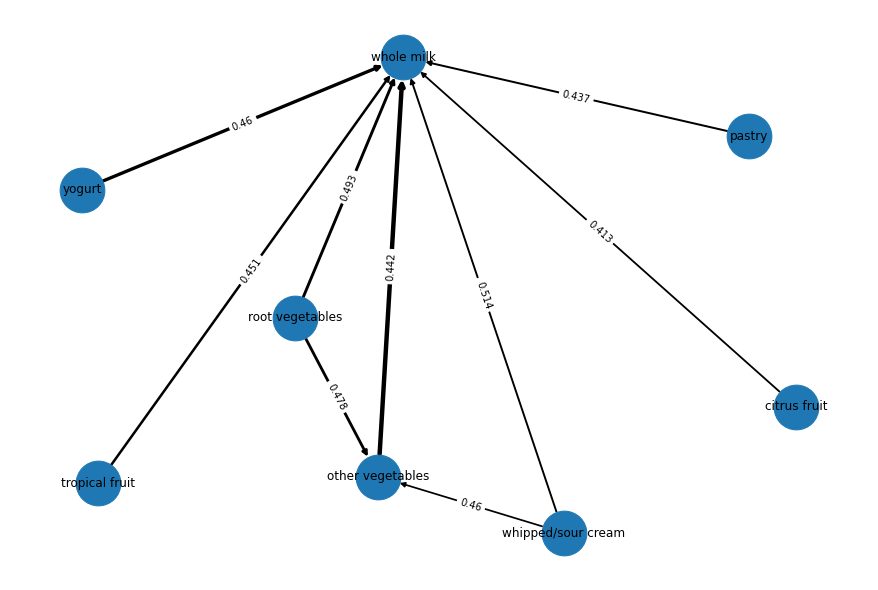

In [284]:
digraph = nx.DiGraph()
for rule in rules_.itertuples(index=False):
    digraph.add_edge(rule.antecedents, rule.consequents, weight=rule.support, label=round(rule.confidence, 3))
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(digraph)
nx.draw(digraph, pos,
    labels={node: '\n'.join(node) for node in digraph.nodes()},
    width=[digraph[u][v]['weight']*30 for u,v in digraph.edges()],
    node_size=2000
)
nx.draw_networkx_edge_labels(digraph, pos, edge_labels=nx.get_edge_attributes(digraph, 'label'))
plt.axis('off')
plt.show()

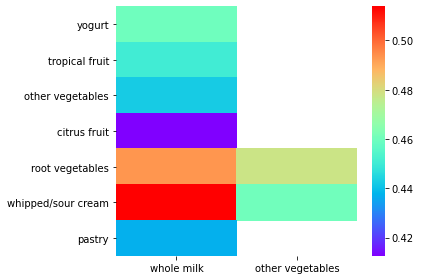

In [262]:
rules_pivot = rules_.pivot(index='antecedents', columns='consequents', values='confidence')
rules_pivot.index = ['\n'.join(ind) for ind in rules_pivot.index]
rules_pivot.columns = ['\n'.join(col) for col in rules_pivot.columns]
sns.heatmap(rules_pivot, cmap='rainbow')
plt.tight_layout()
plt.show()